In [1]:
import os
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
import matplotlib.pyplot as plt
from pygimli import meshtools as mt
from pygimli.physics import ert
from pygimli.physics import traveltime as tt
from SCCI import *
from JointEntropyClass import JointEntropyInversion as JEI
from    pygimli.viewer.mpl      import createColorBarOnly

# Load Data

01/08/23 - 13:20:23 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
01/08/23 - 13:20:23 - pyGIMLi - INFO - Cache C:\Users\azieg\anaconda3\envs\pg\lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (5.2s x 8): C:\Users\azieg\AppData\Roaming\pygimli\Cache\5631322072451977344


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x249d3ce75e0>)

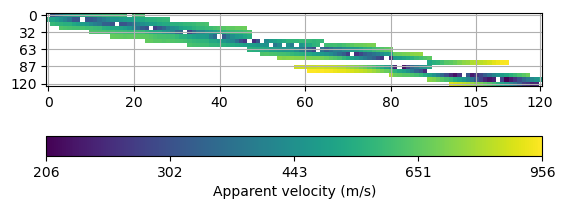

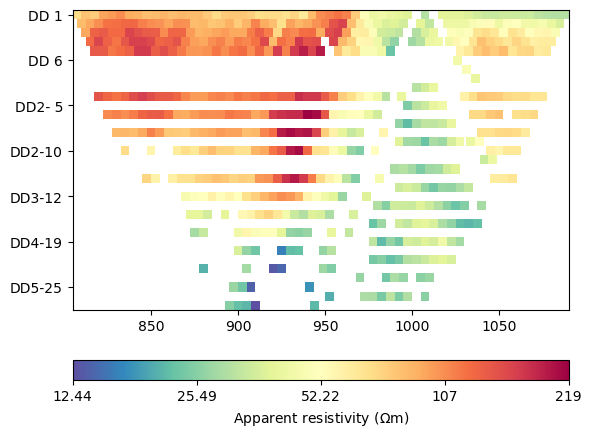

In [2]:
from pygimli import meshtools as mt
from pygimli.physics import ert
from pygimli.physics import traveltime as tt


SRT = tt.load('P3_2_Joint.sgt')
TT = tt.TravelTimeManager(SRT, verbose=True)
tt.errIsAbsolute = True
TT.data["t"] /= 1000 # convert in milisecond
TT.showData()

ERT = ert.load('ERT_3_2_Joint.dat')
sensor_pos = np.loadtxt('ERT_3_2_Sensors_Joint.txt',delimiter=',')
ERT.setSensorPositions(sensor_pos)

ERT['k'] = ert.createGeometricFactors(ERT, numerical=True)
ERT['err'] = ert.estimateError(ERT, absoluteUError=5e-5, relativeError=0.03)
mgr = ert.ERTManager(ERT)
ert.show(ERT, cMin=min(ERT['rhoa']), cMax = max(ERT['rhoa']))

# Conventional Inversions

In [3]:
invmesh = TT.createMesh(SRT,paraMaxCellSize=5.0,paraDepth=50)
extmesh = mt.appendTriangleBoundary(invmesh,xbound=10,ybound=0,marker=1)

v_est = TT.invert(SRT, mesh=extmesh, lam = 65, vTop = 250, vBottom = 2000)

01/08/23 - 13:20:27 - pyGIMLi - INFO - Found 1 regions.
01/08/23 - 13:20:28 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(C:\Users\azieg\anaconda3\envs\pg\lib\site-packages\pygimli\physics\traveltime\TravelTimeManager.py:96)
DataContainer has no "err" values. Fallback to 3%
01/08/23 - 13:20:28 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/08/23 - 13:20:28 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
01/08/23 - 13:20:29 - pyGIMLi - INFO - Create gradient starting model. 250: 2000
01/08/23 - 13:20:29 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00249814 0.00393361 0.00373682 ... 0.00061437 0.00058828 0.0005147 ]
01/08/23 - 13:20:29 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x00000249D3A85270>
Data transformation: <pgcore._pygimli_.RTrans object at 0x00000249D39F2A40>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000249D3A85360>
min/max (data): 0.0056/0.09
min/max (error): 3%/3%
min/max (start model): 5.0e-04/0.004
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 12.73 (dPhi = 96.03%) lam: 65
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.68 (dPhi = 65.6%) lam: 65.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.22 (dPhi = 10.43%) lam: 65.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.13 (dPhi = 2.78%) lam: 65.0
-----------------------------------------

In [4]:
r_est = mgr.invert(lam=30, zWeight=0.5, secNodes=3, verbose=True, blockymodel=True, mesh = extmesh)

01/08/23 - 13:21:06 - pyGIMLi - INFO - Found 1 regions.
01/08/23 - 13:21:06 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/08/23 - 13:21:06 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/08/23 - 13:21:07 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 12040 Cells: 23276 Boundaries: 17858
01/08/23 - 13:21:07 - pyGIMLi - INFO - Use median(data values)=67.5895
01/08/23 - 13:21:07 - pyGIMLi - INFO - Created startmodel from forward operator: 5819 [67.5895,...,67.5895]
01/08/23 - 13:21:07 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000249D3976360>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000249D3BE2EF0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000249DCE0FFA0>
min/max (data): 12.44/219
min/max (error): 3.04%/62.65%
min/max (start model): 67.59/67.59
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 5.39 (dPhi = 95.27%) lam: 30
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.6 (dPhi = 59.25%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.12 (dPhi = 12.02%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.13 (dPhi = 0.33%) lam: 30.0
##################################

C:\Users\azieg\AppData\Local\Temp\ipykernel_16144\3720673788.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


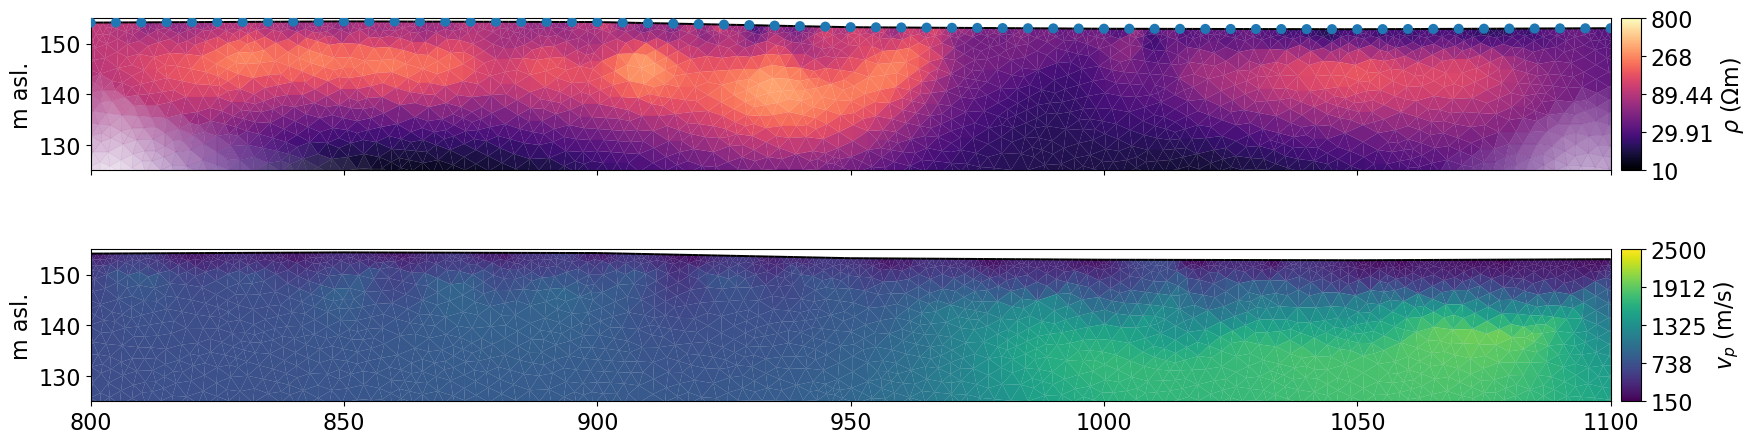

In [5]:
plt.rcParams['font.size'] = 16
rKW = dict(logScale=True, cMin=10, cMax=800, ylabel="m asl.", cMap = 'magma',# coverage = mgr.standardizedCoverage(threshold=-2), 
           orientation="vertical", showTopo = True, label = r"$\rho$ ($\Omega$m)")
vKW = dict(logScale=False, cMin=150, cMax=2500, ylabel = "m asl.",# coverage = TT.standardizedCoverage(), 
           orientation = 'vertical', cMap = 'viridis', label = r"$v_p$ (m/s)")

fig, (ax1,ax2) = plt.subplots(2,1,figsize = (20,8), gridspec_kw={'hspace':-.4}, sharex=True)
mgr.showResult(ax=ax1, **rKW)
ax1.axis(xmin = 800, xmax=1100,ymin=125,ymax=155)
#drawCWeight(ax1, mgr.paraDomain, mgr.inv.inv.cWeight())
TT.showResult(ax=ax2, **vKW)
ax2.axis(xmin = 800, xmax=1100,ymin=125,ymax=155)
#drawCWeight(ax2, TT.paraDomain, TT.inv.inv.cWeight())
fig.tight_layout()


# SCCI (Skibbe)

0.39334839874510524 0.4640449553234357 0.8977341675959106 0.9532718316989228
Coupled inversion 1
Coupled inversion 2
Coupled inversion 3
Coupled inversion 4
Coupled inversion 5
0.4640449553234357 0.39334839874510524


C:\Users\azieg\AppData\Local\Temp\ipykernel_16144\2411800518.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


The chi² values of ERT and SRT are 1.5697273229514894 and 0.6422569098893853


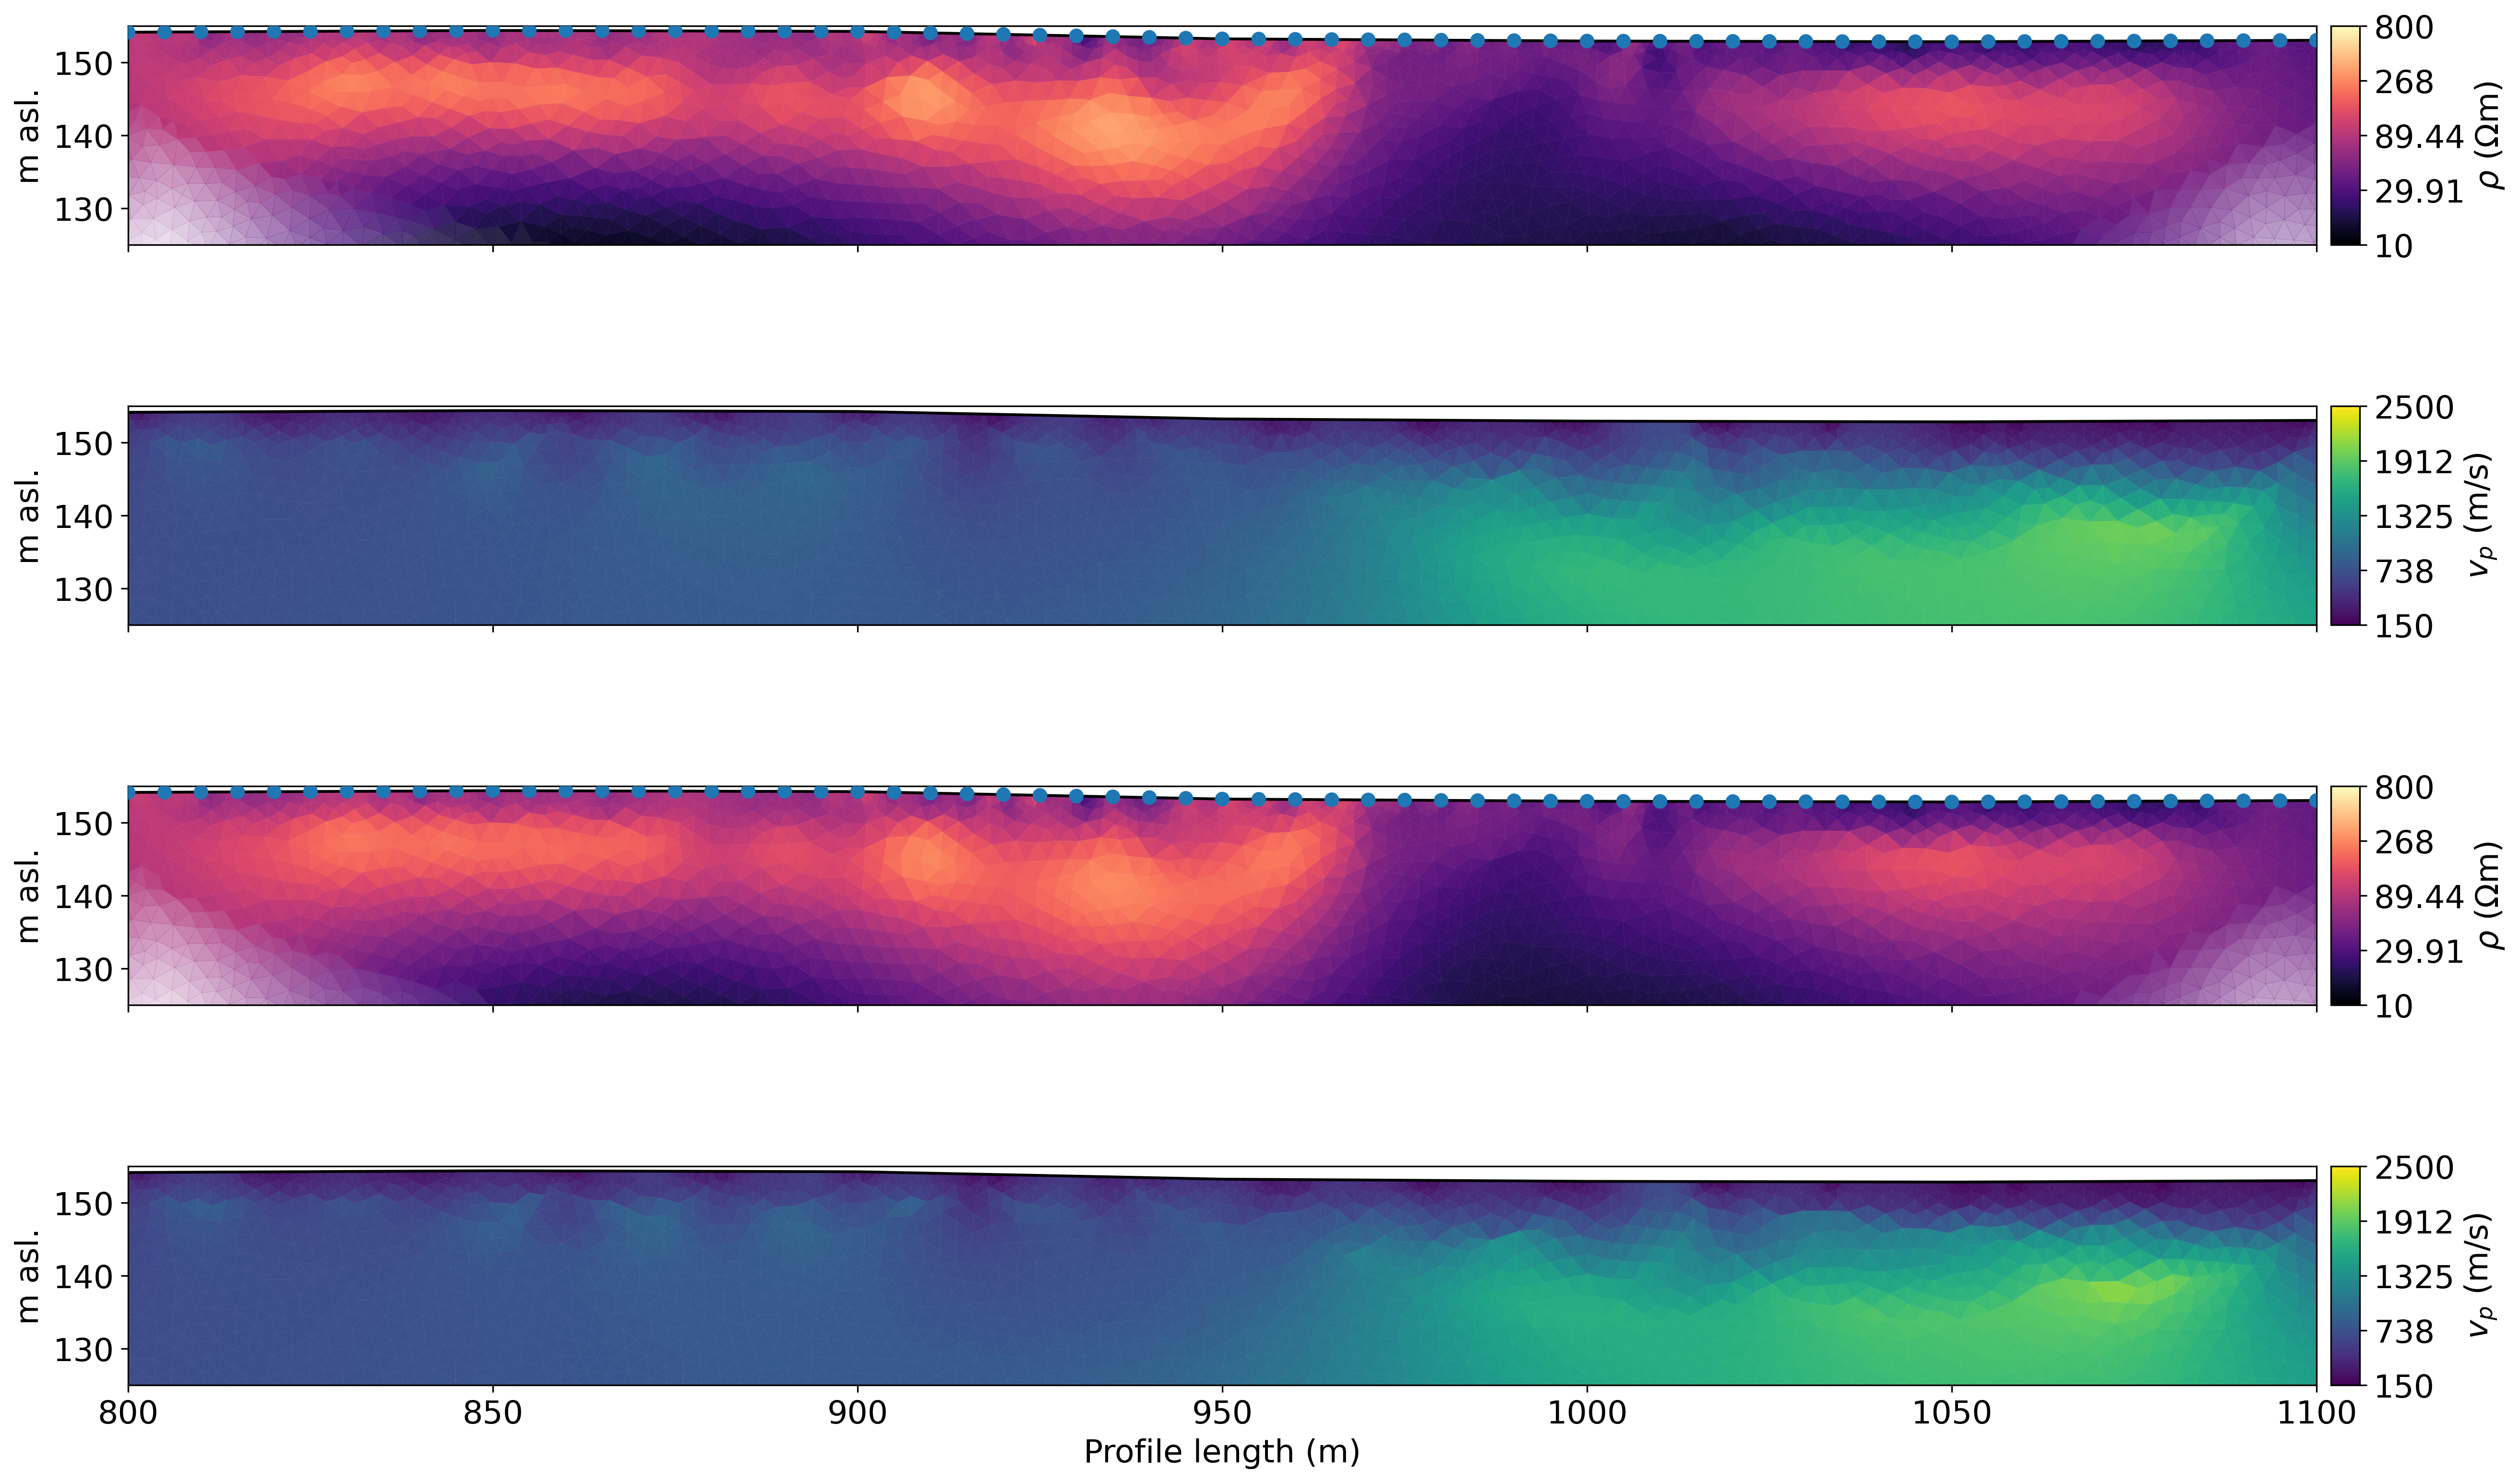

In [6]:
par_a = np.arange(0.05, 0.45, 0.05)

# %% setup scci class and give manager
scci = SCCI([mgr, TT], names=["ERT", "TT"])

scci.a = 0.3
scci.b = 0.05
scci.c = 1.0
scci.cmin = scci.b

# %%
cw = scci.singleCWeights()
print(min(cw[0]), min(cw[1]), np.mean(cw[0]), np.mean(cw[1]))


fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(20,16), dpi=300,  gridspec_kw={'hspace':-.4}, sharex=True)

mgr.showResult(ax=ax1, **rKW)
ax1.axis(xmin = 800, xmax=1100,ymin=125,ymax=155)

TT.showResult(ax=ax2,**vKW)
ax2.axis(xmin = 800, xmax=1100,ymin=125,ymax=155)

# %%
scci.runCoupled(maxIter=5)
print(min(mgr.inv.inv.cWeight()), min(TT.inv.inv.cWeight()))
# %%

mgr.inv.model = mgr.inv.inv.model()
r_est_scci = mgr.inv.inv.model()

TT.inv.model = 1./TT.inv.inv.model()
v_est_scci =  1./TT.inv.inv.model()
# %%
mgr.showResult(ax=ax3, **rKW)
#drawCWeight(ax3, mgr.paraDomain, mgr.inv.inv.cWeight())
ax3.axis(xmin = 800, xmax=1100,ymin=125,ymax=155)
#plt.savefig("ERT_coupled.png")
TT.showResult(ax=ax4,**vKW)
#drawCWeight(ax4, TT.paraDomain, TT.inv.inv.cWeight())
ax4.axis(xmin = 800, xmax=1100,ymin=125,ymax=155)
ax4.set_xlabel("Profile length (m)")
#plt.savefig("TT_coupled.png")
fig.tight_layout()

#plt.savefig("F:/Doktor/Poster/P3_2_right.png", dpi = 300)

print("The chi² values of ERT and SRT are", mgr.inv.chi2(), "and", TT.inv.chi2())

# Joint Minimum Entropy Inversion

## Pre-Inversion Setups

In [7]:
# SRT Data manager
tt_data = tt.load('P3_2_Joint.sgt')
TT_J = tt.TravelTimeManager(tt_data, verbose=True)
tt.errIsAbsolute = True
TT_J.data["t"] /= 1000 # convert in milisecond

# ERT Data manager
ert_data = ert.load('ERT_3_2_Joint.dat')
ert_data.setSensorPositions(sensor_pos)
ert_data['k'] = ert.createGeometricFactors(ert_data, numerical=True)
ert_data['err'] = ert.estimateError(ert_data, absoluteUError=5e-5, relativeError=0.03)
ERT_J = ert.ERTManager(ert_data)

# TT_J.showData()
# ert.show(ert_data, cMin=min(ert_data['rhoa']), cMax = max(ert_data['rhoa']))

01/08/23 - 13:27:09 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
01/08/23 - 13:27:09 - pyGIMLi - INFO - Cache C:\Users\azieg\anaconda3\envs\pg\lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (5.2s x 9): C:\Users\azieg\AppData\Roaming\pygimli\Cache\5631322072451977344


## JME Inversion Manager

Maybe use my synthetic data study to find good settings (see PDFs in zip):

<img align="left" src="./Comp_ME_lam_a_q1_ERT.pdf">
<img align="left" src="./Comp_ME_lam_a_q2_ERT.pdf">
<img align="left" src="./Comp_ME_lam_a_q1_SRT.pdf">
<img align="left" src="./Comp_ME_lam_a_q2_SRT.pdf">

In [8]:
# JME parameters
q=1
beta = 1e-10

lam_ert = 3e-3
a_ert = 70

lam_srt = 7e-2
a_srt = 40

01/08/23 - 13:29:49 - pyGIMLi - INFO - Found 1 regions.
01/08/23 - 13:29:49 - pyGIMLi - INFO - Creating forward mesh from region infos.


Starting Iteration 0...
... ERT


01/08/23 - 13:29:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/08/23 - 13:29:50 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 12040 Cells: 23276 Boundaries: 17858
01/08/23 - 13:29:50 - pyGIMLi - INFO - Setting starting model as reference!
01/08/23 - 13:31:15 - pyGIMLi - INFO - Found 1 regions.


... SRT


01/08/23 - 13:31:15 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(C:\Users\azieg\anaconda3\envs\pg\lib\site-packages\pygimli\physics\traveltime\TravelTimeManager.py:96)
DataContainer has no "err" values. Fallback to 3%
01/08/23 - 13:31:15 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/08/23 - 13:31:15 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
01/08/23 - 13:31:16 - pyGIMLi - INFO - Create gradient starting model. 200: 2000
01/08/23 - 13:31:16 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00282014 0.00489381 0.00458484 ... 0.00061841 0.00059126 0.00051513]
01/08/23 - 13:31:16 - pyGIMLi - INFO - Setting starting model as reference!
01/08/23 - 13:31:24 - pyGIMLi - INFO - Use median(data values)=67.5895
01/08/23 - 13:31:24 - pyGIMLi - INFO - Created startmodel from forward operator: 5819 [67.5895,...,67.5895]


Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=70
Set JME weights for SRT with q=1, b=1e-10 and a=40
#####     ERT weighted misfit chi^2   = 6.44
#####     SRT weighted misfit chi^2   = 4.35
#####     stabilizing functional    S = 7661.23
#####     joint weighted misfit chi^2 = 10.79
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=70
Set JME weights for SRT with q=1, b=1e-10 and a=40
#####     ERT weighted misfit chi^2   = 1.58
#####     SRT weighted misfit chi^2   = 3.91
#####     stabilizing functional    S = 31.73
#####     joint weighted misfit chi^2 = 5.50
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=70
Set JME weights for SRT with q=1, b=1e-10 and a=40
#####     ERT weighted misfit chi^2   = 0.77
#####     SRT weighted misfit chi^2   = 3.39
#####     stabilizing functio

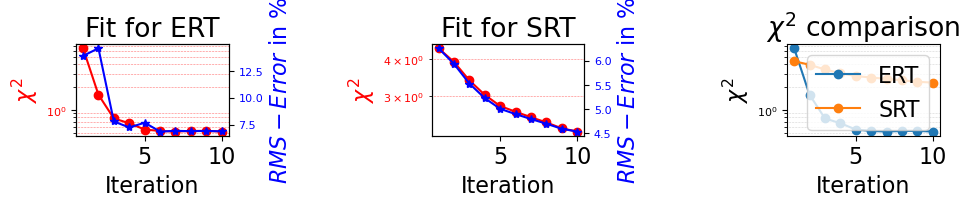

In [9]:
# Set Parameters
a = [a_ert, a_srt]
lam = [lam_ert, lam_srt]
beta = beta
w1 = 10 # weight ert
w2 = 1 # weight srt

# Initiate Maager
J1 = JEI(mgr_list=[ERT_J,TT_J], data_list=[ERT,SRT], 
         mesh=extmesh, order=q, beta=beta,smooth_factor=a)

# Set Pre-Inversion stuff
KWs = dict(lam=lam[1], verbose=False, vTop = 200, vBottom = 2000, secNodes=2)
KWe = dict(lam=lam[0], verbose=False, zWeight=0.5, blockymodel=True, startModel=100)
# J1.setMethodMesh(extmesh, 0)
J1.setKWInv([KWe, KWs])
J1.setNames(['ERT','SRT'])
J1.setMethodWeights([w1,w2])

# Run inversion
J1.runInversion('ME', maxIter=10, breakup_criterion='all', chi_limit=1.5)
TT_J.inv.model = 1/TT_J.inv.model

[r_est_jme, v_est_jme] = J1.getModels()
    
J1.plotFitHistory()

# Show results

In [49]:
%matplotlib qt

plt.rcParams['font.size'] = 10
rKW = dict(logScale=True, cMin=10, cMax=800, ylabel="m asl.", cMap = 'magma',# coverage = ERT_J.standardizedCoverage(threshold=-2.2),
          showTopo = True, label = r"$\rho$ ($\Omega$m)", orientation='vertical')
vKW = dict(logScale=False, cMin=150, cMax=2500, ylabel = "m asl.", coverage = TT_J.standardizedCoverage(),
           cMap = 'viridis', label = r"$v_p$ (m/s)", orientation='vertical')



v_start = 1/TT_J.inv.startModel
r_start = ERT_J.inv.startModel

r = [r_start, r_est, r_est_scci, r_est_jme]
v = [v_start, v_est, v_est_scci, v_est_jme]
label = ['Start', 'Conventional', 'SCCI', 'JME']

fig, ax = plt.subplots(2*len(r),1,figsize=(20,19),sharex=True)#,  gridspec_kw={'hspace':-.4})
for i in [0,1,2,3]:
    pg.show(invmesh, r[i], ax=ax[i], **rKW)
    pg.show(invmesh, v[i], ax=ax[i+len(r)], **vKW)
        
    for axis in [ax[i],ax[i+len(r)]]:
        axis.text(803, 130, label[i], fontsize=10, 
                  bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    
for axis in ax:
    axis.axis(xmin = 800, xmax=1100,ymin=125,ymax=155)
    
ax[-1].set_xlabel("Profile length (m)", fontsize=10)
        
fig.tight_layout()
    

In [47]:
# This plots modelweights of iterations of all methods with the log-part that is shared by all methods
J1.plotWeights('ME', step=3)

In [44]:
# ERT_J.showMisfit()

In [45]:
l1 = mt.createPolygon([[1010,152],[1017,139],[1040,136],[1075,138],[1082,143]],
                      isClosed=False, addNodes=5, interpolate='spline')

l2 = mt.createPolygon([[835,136],[857,131],[869,133],[877,135]],
                      isClosed=False, addNodes=5, interpolate='spline')

l3 = mt.createPolygon([[954,129],[972,150]],
                      isClosed=False, addNodes=5, interpolate='spline')

In [46]:
%matplotlib qt

fig, ax = plt.subplots(2,1,figsize=(10,4),sharex=True)#,  gridspec_kw={'hspace':-.4})

for l in [l1,l2,l3]:
    pg.show(l, ax=ax[0])
    pg.show(l, ax=ax[1])
pg.show(invmesh, r[-1], ax=ax[0], **rKW)
pg.show(invmesh, v[-1], ax=ax[1], **vKW)



(<Axes: ylabel='m asl.'>, <matplotlib.colorbar.Colorbar at 0x24a92f505b0>)